In [1]:
import numpy as np
import torch 
import matplotlib.pyplot as plt
from utils_mouse import DataLoaderMouse
from utils import DataLoader
from st_graph import ST_GRAPH
import pickle
from model import SRNN
from sample import sample
from torch.autograd import Variable

from helper import getCoef, sample_gaussian_2d, compute_edges, get_mean_error, get_final_error
from criterion import Gaussian2DLikelihood, Gaussian2DLikelihoodInference
from warnings import filterwarnings
filterwarnings("ignore")
from scipy.stats import multivariate_normal

from scipy.stats import gaussian_kde
from matplotlib import animation

In [2]:
%load_ext autoreload
%autoreload 

In [3]:
with open('./save/config.pkl', 'rb') as f:
    saved_args = pickle.load(f)
saved_args.obs_length = 15
saved_args.pred_length = 5

In [4]:
saved_args

Namespace(attention_size=64, batch_size=8, body_keypoint=None, decay_rate=0.99, dropout=0.2, grad_clip=10.0, human_human_edge_embedding_size=64, human_human_edge_input_size=2, human_human_edge_rnn_size=256, human_node_embedding_size=64, human_node_input_size=2, human_node_output_size=5, human_node_rnn_size=128, lambda_param=5e-05, learning_rate=0.0001, leaveDataset=0, num_epochs=200, obs_length=15, pred_length=5, seq_length=20, train_frac=0.1, wandb=True)

In [5]:
def train_visualization(nodes,color_dict=None):
    print('Visualization imminent')
    if color_dict == None:color_dict = {k:np.random.rand(3) for k in range(nodes.shape[1])}
    else: color_dict = color_dict
    for frames in range(nodes.shape[0]+1):

        fig = plt.figure(figsize=(7,7))
        try:
            current_frame = nodes[frames,:,:]
            current_peds = np.array([i for i,(x,y) in enumerate(current_frame) if (x != 0) and (y != 0)])
        except:pass
        for frame_id in range(frames):
            current_frame = nodes[frame_id,:,:]
            current_peds = np.array([i for i,(x,y) in enumerate(current_frame) if (x != 0) and (y != 0)])
            plt.scatter(current_frame[current_peds][:,1],current_frame[current_peds][:,0],c = [color_dict[c] for c in current_peds],marker='o')
            
            if frame_id>0:
                
                prev_frame = nodes[frame_id-1,:,:]
                prev_peds  = np.array([i for i,(x,y) in enumerate(prev_frame) if (x != 0) and (y != 0)])
                common = np.array(list(set(prev_peds) & set(current_peds)))
                for i in range(len(common)):
                    plt.plot([prev_frame[common[i], 1], current_frame[common[i], 1]],[prev_frame[common[i], 0], current_frame[common[i], 0]],\
                             c = color_dict[common[i]],linestyle='dashed')
        if frames!=0:
            plt.scatter(current_frame[current_peds][:,1],current_frame[current_peds][:,0],c ='k',marker='D')
            
        plt.xlim((0,1))
        plt.ylim((0,1))
#         plt.savefig(f'./images/{frames}.png')
        #print(f'saved fig {frames}')
        plt.show() 

In [6]:
nodes.shape

NameError: name 'nodes' is not defined

In [6]:
dataloader = DataLoader(1, saved_args.obs_length+saved_args.pred_length,[0],True,infer=True)
dataloader.reset_batch_pointer()

Creating pre-processed data from raw data
Training data from dataset 0 : 861
Validation data from dataset 0 : 0
Total number of training batches: 86
Total number of validation batches: 0


In [7]:
x, _, frameIDs, d = dataloader.next_batch(randomUpdate=False)
stgraph = ST_GRAPH(1, 20,body_keypoint = [0])

In [8]:
stgraph.readGraph(x)
nodes, edges, nodesPresent, edgesPresent = stgraph.getSequence()

In [10]:
nodes

array([[[[-0.1375   ,  0.3625   ]],

        [[ 0.       ,  0.       ]],

        [[ 0.       ,  0.       ]],

        [[ 0.       ,  0.       ]],

        [[ 0.       ,  0.       ]],

        [[ 0.       ,  0.       ]],

        [[ 0.       ,  0.       ]],

        [[ 0.       ,  0.       ]]],


       [[[-0.12083  ,  0.47361  ]],

        [[ 0.       ,  0.       ]],

        [[ 0.       ,  0.       ]],

        [[ 0.       ,  0.       ]],

        [[ 0.       ,  0.       ]],

        [[ 0.       ,  0.       ]],

        [[ 0.       ,  0.       ]],

        [[ 0.       ,  0.       ]]],


       [[[-0.10312  ,  0.5875   ]],

        [[ 0.       ,  0.       ]],

        [[ 0.       ,  0.       ]],

        [[ 0.       ,  0.       ]],

        [[ 0.       ,  0.       ]],

        [[ 0.       ,  0.       ]],

        [[ 0.       ,  0.       ]],

        [[ 0.       ,  0.       ]]],


       [[[-0.075    ,  0.7      ]],

        [[ 0.040625 ,  0.73333  ]],

        [[ 0.       ,  0.       

In [ ]:
net = SRNN(saved_args, True)
net.cuda()
state_dict = torch.load('')

net.load_state_dict(state_dict['state_dict'])
dataloader = DataLoaderM(5, saved_args.obs_length+saved_args.pred_length,[0],True,infer=True)
dataloader.reset_batch_pointer()

In [326]:
len(dataloader.data[1])

35

In [7]:
f = open('./save/results.pkl', 'rb')
results = pickle.load(f)

In [9]:
len(results)

600

In [360]:
%load_ext autoreload
%autoreload 
dataloader = DataLoaderMouse(5, 21,forcePreProcess=True,normalise=True,skip_frames_by_static=None,frames = 100,\
                            train_frac = 0.25,val_fraction = 0.5,body_keypoint = "5")
dataloader.reset_batch_pointer()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Mouse data is being processed...
Creating pre-processed data from raw data


Processing Sequence ......:   0%|          | 0/400 [00:00<?, ?it/s]

Skip Frame Mode: Naive Skip, Frequency: 20 frames
Normalisation is enabled
Total number of training batches: 320
Total number of validation batches: 160
Total Out of Box indices: 1200


In [19]:
arr[15]

array([[[ 0.03108065,  0.28354263],
        [ 0.05099107,  0.49034184],
        [-0.0242353 ,  0.3190518 ],
        [ 0.02199623,  0.41513342],
        [ 0.02943176,  0.23838346],
        [ 0.05136498,  0.42046186],
        [-0.05701914,  0.1644894 ],
        [-0.03650206,  0.30639377],
        [ 0.01824922,  0.29197332],
        [-0.00807491,  0.13004062],
        [-0.03561875,  0.0750974 ],
        [-0.04398254, -0.07429142]],

       [[-0.09734112, -0.11443765],
        [-0.11977939, -0.09451371],
        [-0.1448907 , -0.10572837],
        [-0.15133803, -0.1358805 ],
        [-0.12064173, -0.12440263],
        [-0.1159064 , -0.11168424],
        [-0.09617296, -0.07633752],
        [-0.0960053 , -0.13829026],
        [-0.11863799, -0.04735478],
        [-0.05984606, -0.0523082 ],
        [-0.09332436, -0.12590343],
        [-0.0746441 , -0.12638429]],

       [[ 0.08792037, -0.3305635 ],
        [-0.03966953, -0.19341153],
        [-0.00508643, -0.2995548 ],
        [-0.05402888, -0

In [8]:
x, _, frameIDs, d = dataloader.next_batch(randomUpdate=False)
stgraph = ST_GRAPH(1, 21)
stgraph.readGraph(x)
nodes, edges, nodesPresent, edgesPresent = stgraph.getSequence()
arr= nodes.squeeze()
# nodes = Variable(torch.from_numpy(nodes).float(), volatile=True).cuda()
# edges = Variable(torch.from_numpy(edges).float(), volatile=True).cuda()
# obs_nodes, obs_edges, obs_nodesPresent, obs_edgesPresent = nodes[:saved_args.obs_length], edges[:saved_args.obs_length], \
# nodesPresent[:saved_args.obs_length], edgesPresent[:saved_args.obs_length]

NameError: name 'dataloader' is not defined

In [10]:
FRAME_WIDTH_TOP = 2
FRAME_HEIGHT_TOP = 2
M1_COLOR = 'lawngreen'
M2_COLOR = 'skyblue'
M3_COLOR = 'tomato'

PLOT_MOUSE_START_END = [(0, 1), (1, 3), (3, 2), (2, 0),        # head
                        (3, 6), (6, 9),                        # midline
                        (9, 10), (10, 11),                     # tail
                        (4, 5), (5, 8), (8, 9), (9, 7), (7, 4) # legs
                       ]

In [11]:
def set_figax():
    fig = plt.figure()

    img = np.zeros((FRAME_HEIGHT_TOP, FRAME_WIDTH_TOP, 3))

    ax = fig.add_subplot(111)
#     ax.imshow(img)

    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    return ax

In [12]:
def plot_mouse(ax, pose, color):
    # Draw each keypoint
    for j in range(pose.shape[0]):
        ax.plot(pose[j, 0], pose[j, 1], 'o', color=color, markersize=3)

    # Draw a line for each point pair to form the shape of the mouse

    for pair in PLOT_MOUSE_START_END:
        line_to_plot = pose[pair, :]
        ax.plot(line_to_plot[:, 0], line_to_plot[
                :, 1], color=color, linewidth=1)

In [20]:
arr = results[2][1]

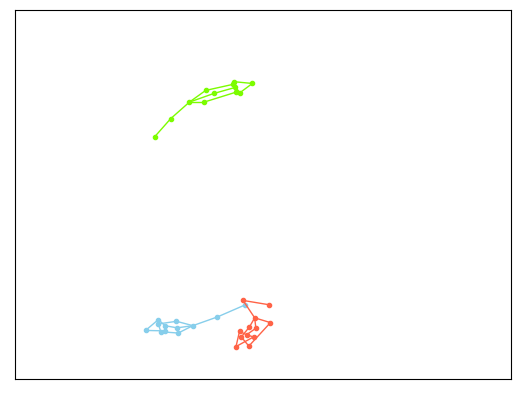

0


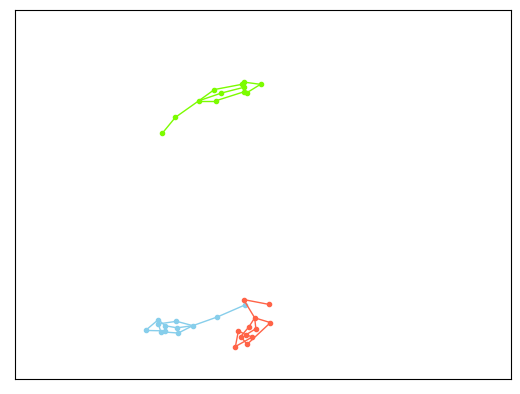

1


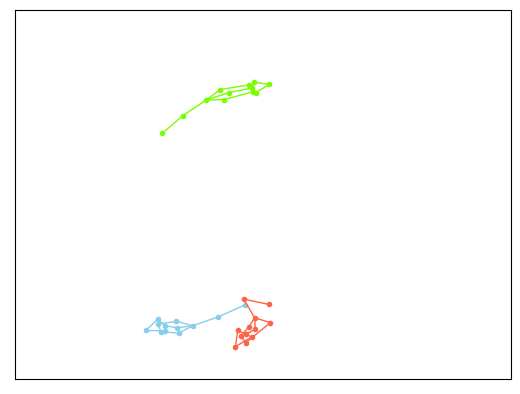

2


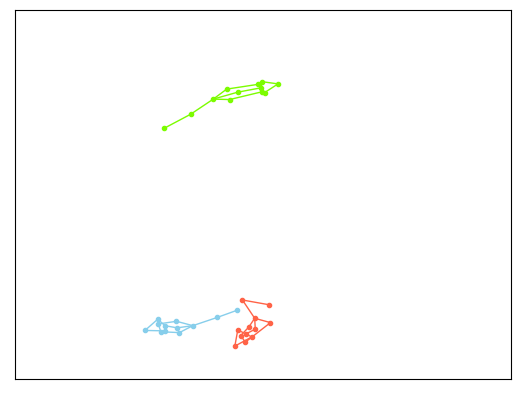

3


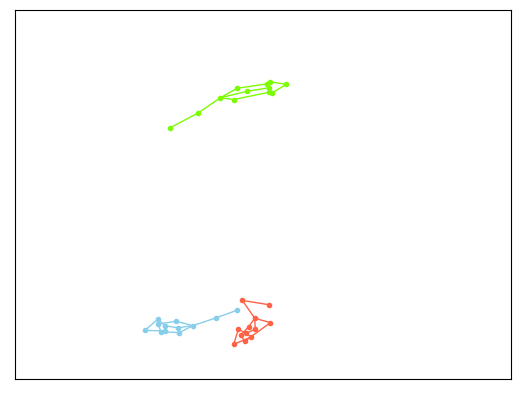

4


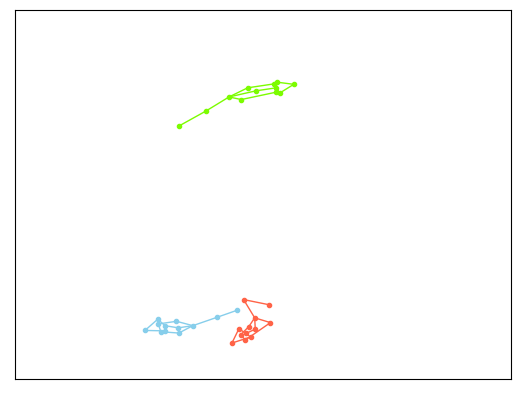

5


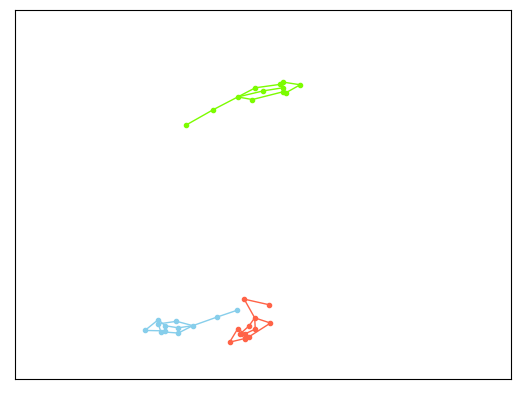

6


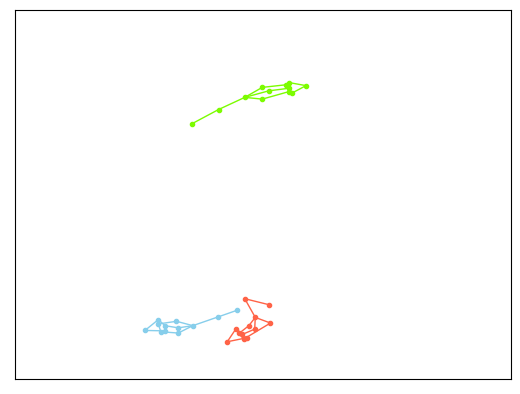

7


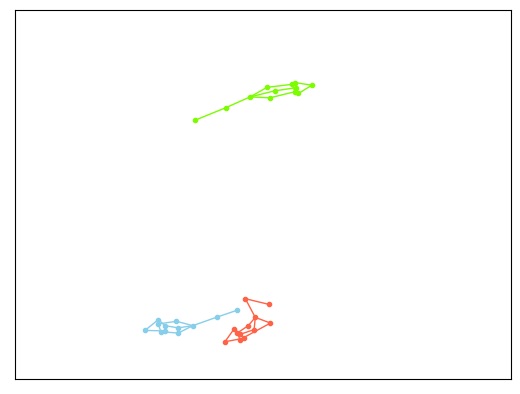

8


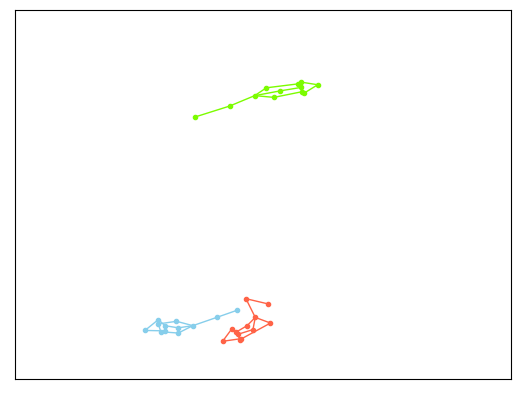

9


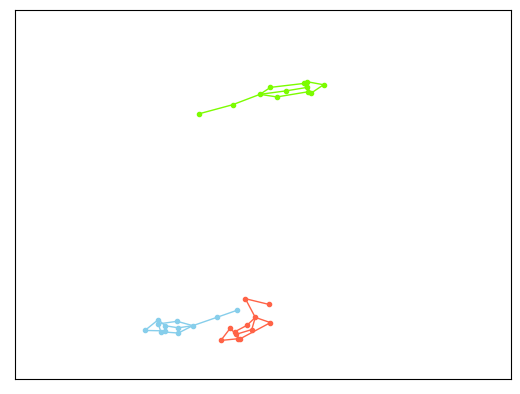

10


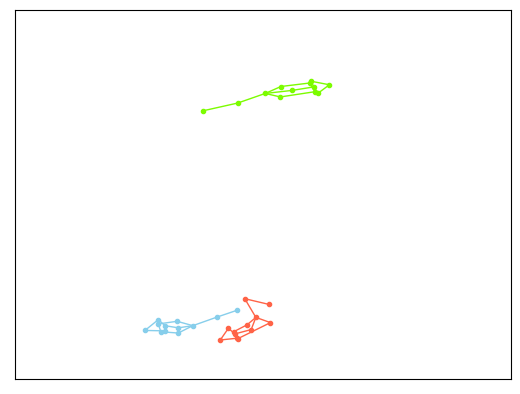

11


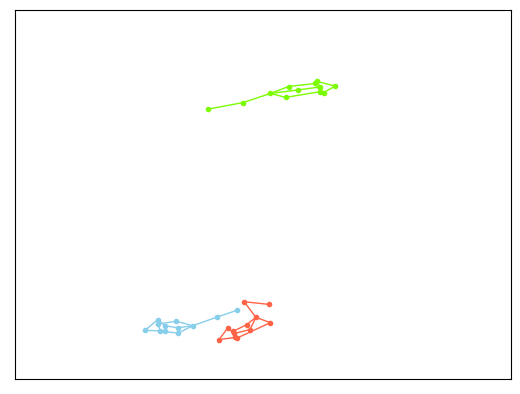

12


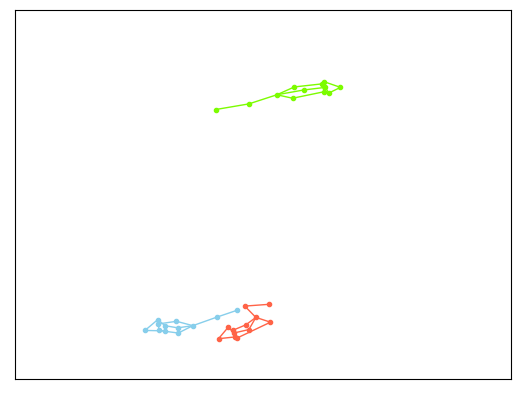

13


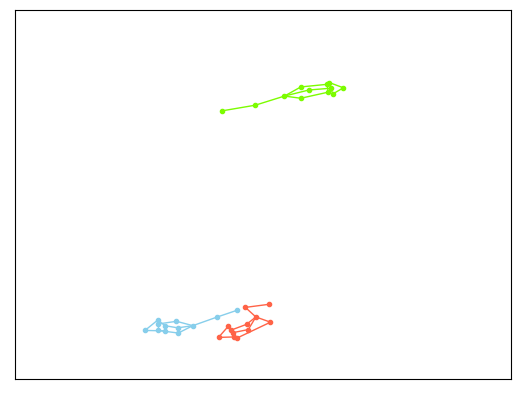

14


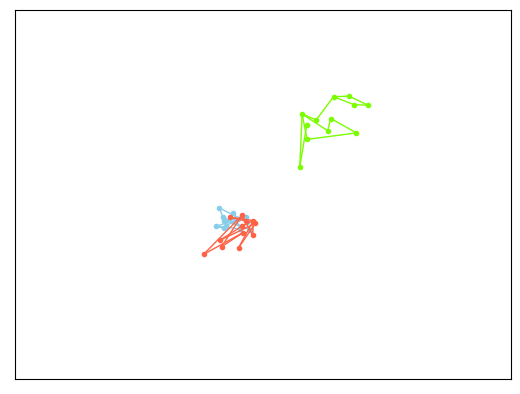

15


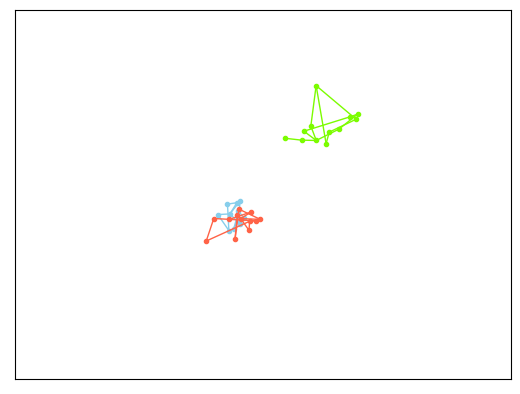

16


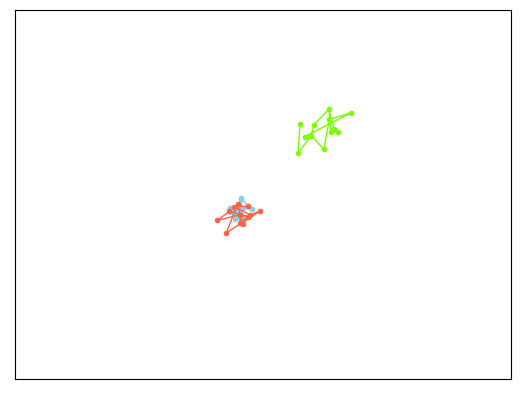

17


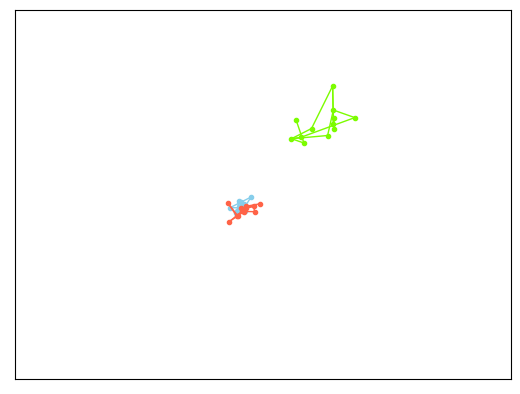

18


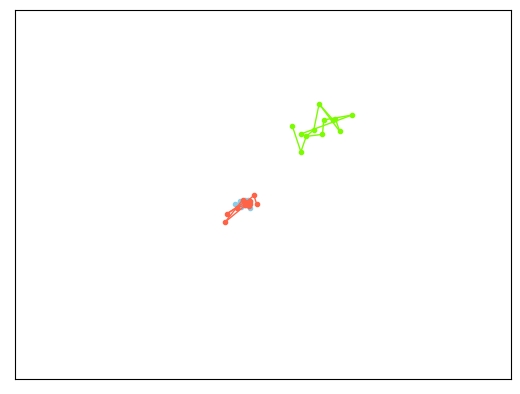

19


In [23]:
for i in range(arr.shape[0]):
    ax = set_figax()
    plot_mouse(ax,arr[i,0,:,:],M1_COLOR)
    plot_mouse(ax,arr[i,1,:,:],M2_COLOR)
    plot_mouse(ax,arr[i,2,:,:],M3_COLOR)
    plt.xlim((-1,1))
    plt.ylim((-1,1))

#     try:
    plt.savefig(f'./mouseplots/{i}.png') 
    plt.show()
    print(i)

In [270]:
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib import colors
from matplotlib import rc

rc('animation', html='jshtml')

# Note: Image processing may be slow if too many frames are animated.

#Plotting constants

PLOT_MOUSE_START_END = [(0, 1), (1, 3), (3, 2), (2, 0),        # head
                        (3, 6), (6, 9),                        # midline
                        (9, 10), (10, 11),                     # tail
                        (4, 5), (5, 8), (8, 9), (9, 7), (7, 4) # legs
                       ]

def animate_pose_sequence(seq):
    # Returns the animation of the keypoint sequence between start frame
    # and stop frame. Optionally can display annotations.

    image_list = []

    counter = 0
    anim_range = range(0, seq.shape[0])

    for j in anim_range:
        if counter%20 == 0:
            print("Processing frame ", j)
        fig,ax = set_figax()
        plot_mouse(ax, seq[j, 0, :, :], color=M1_COLOR)
        plot_mouse(ax, seq[j, 1, :, :], color=M2_COLOR)
        plot_mouse(ax, seq[j, 2, :, :], color=M3_COLOR)

        ax.axis('off')
        fig.tight_layout(pad=0)
        ax.margins(0)

        fig.canvas.draw()
        image_from_plot = np.frombuffer(fig.canvas.tostring_rgb(),
                                        dtype=np.uint8)
        image_from_plot = image_from_plot.reshape(
            fig.canvas.get_width_height()[::-1] + (3,))

        image_list.append(image_from_plot)

        plt.close()
        counter = counter + 1

    # Plot animation.
    fig = plt.figure(figsize=(8,8))
    plt.axis('off')
    im = plt.imshow(image_list[0])

    def animate(k):
        im.set_array(image_list[k])
        return im,
    ani = animation.FuncAnimation(fig, animate, frames=len(image_list), blit=True)
    return ani

Processing frame  0
Processing frame  20


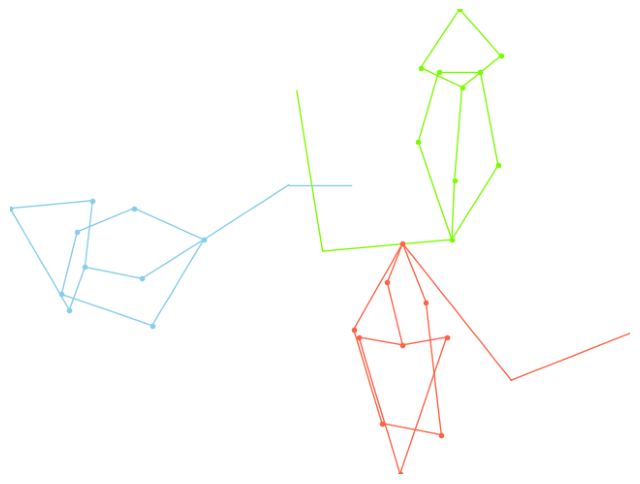

In [271]:
ani = animate_pose_sequence(nodes)

In [237]:
nodes.shape

(21, 3, 12, 2)

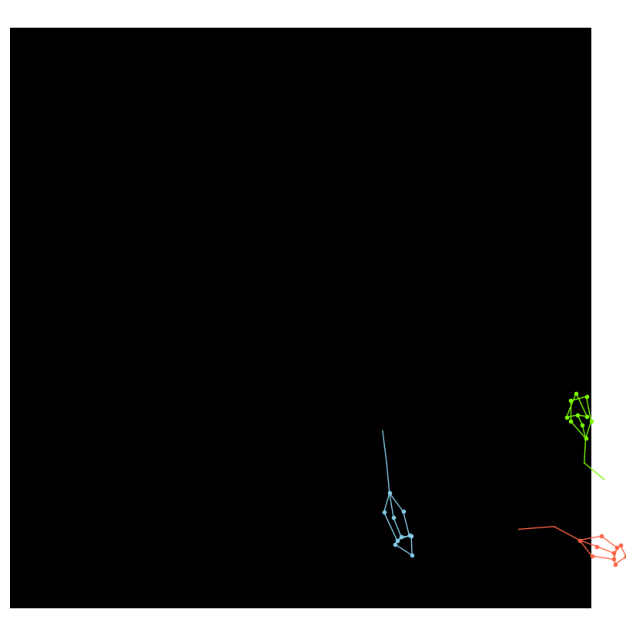

In [53]:
arr[10]

array([[633., 114.],
       [599., 114.],
       [641.,  75.]])

Visualization imminent


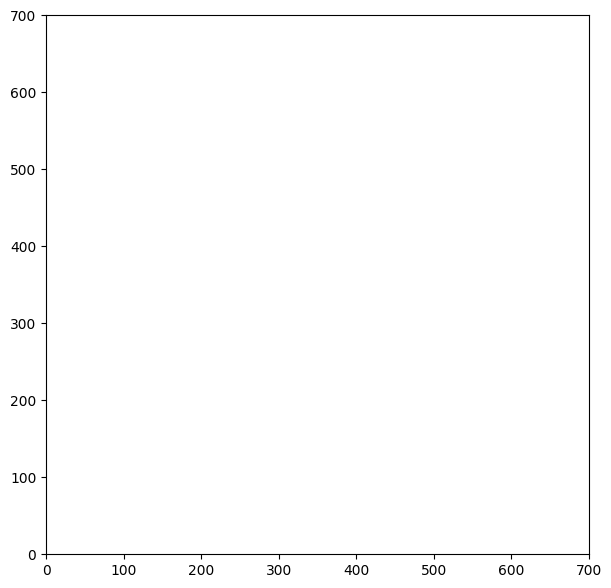

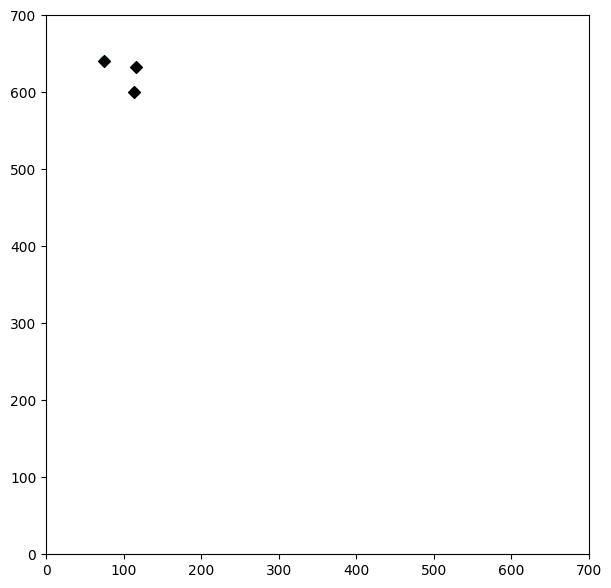

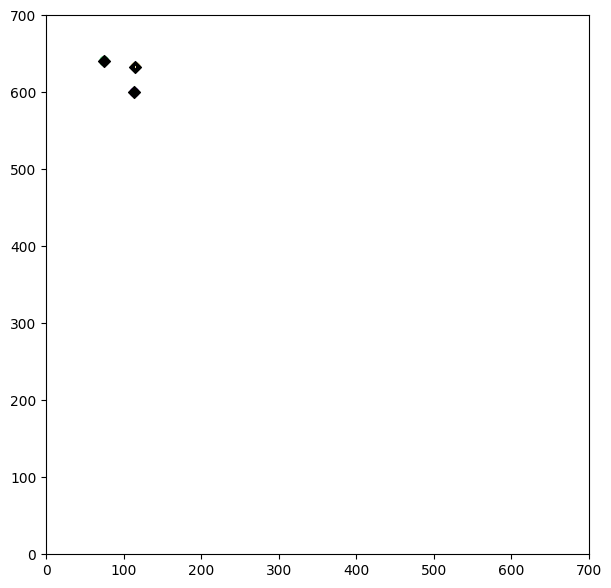

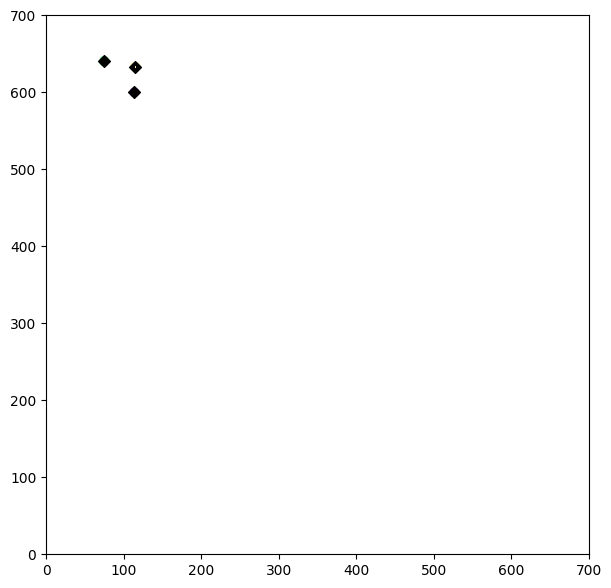

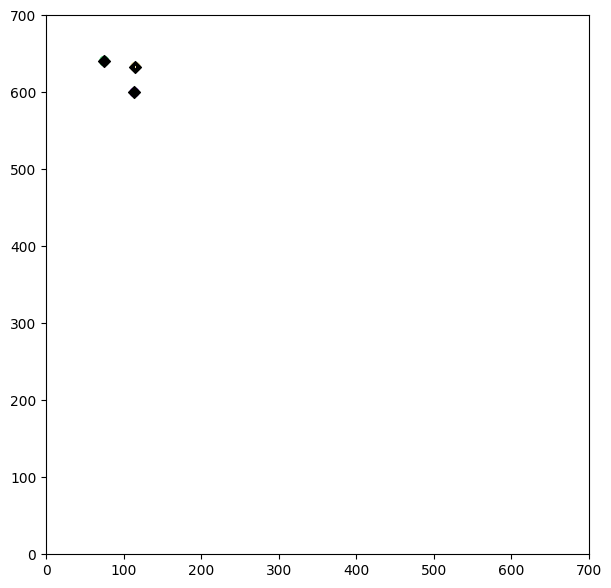

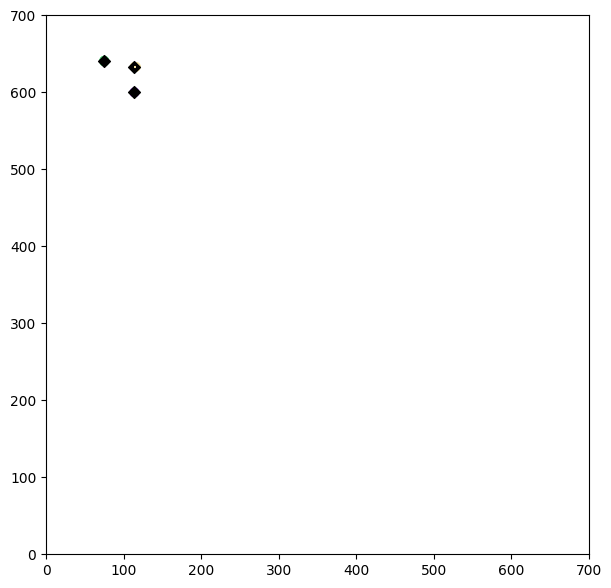

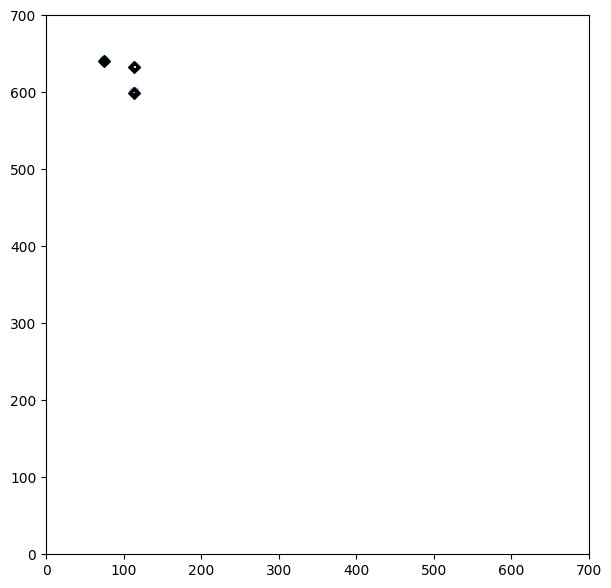

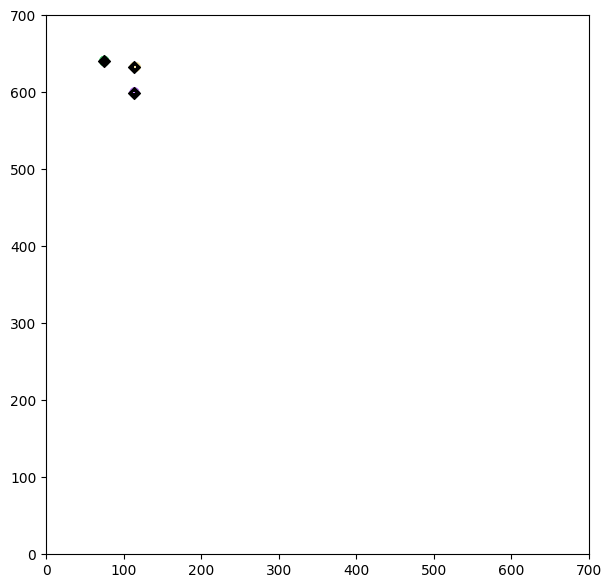

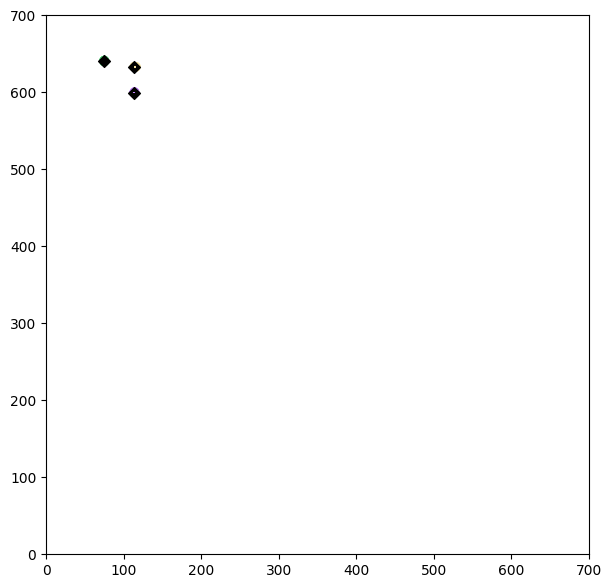

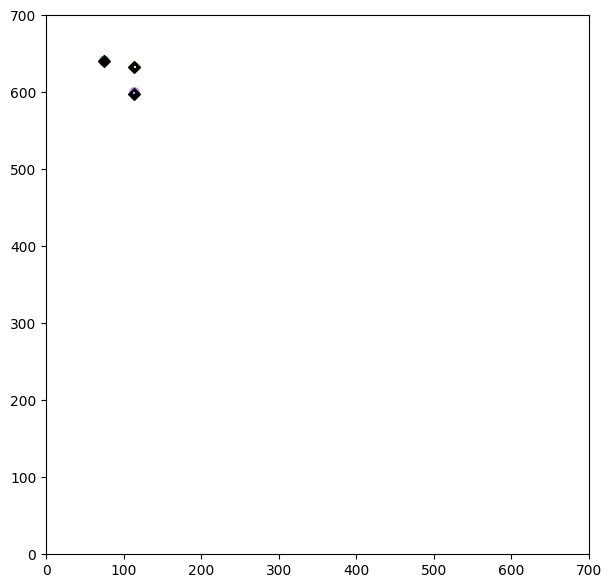

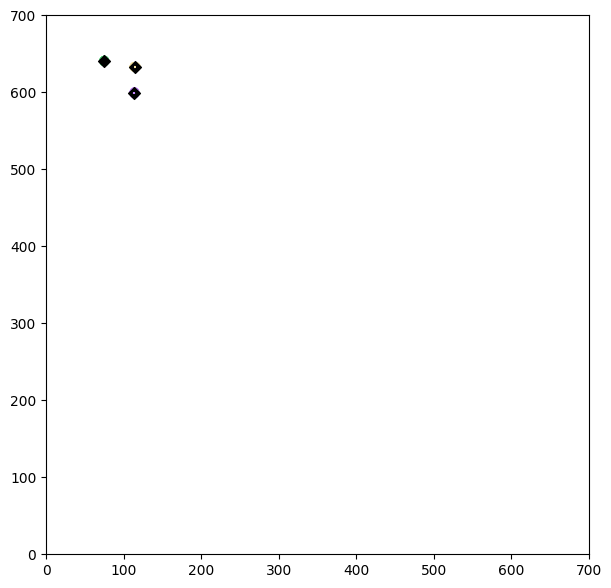

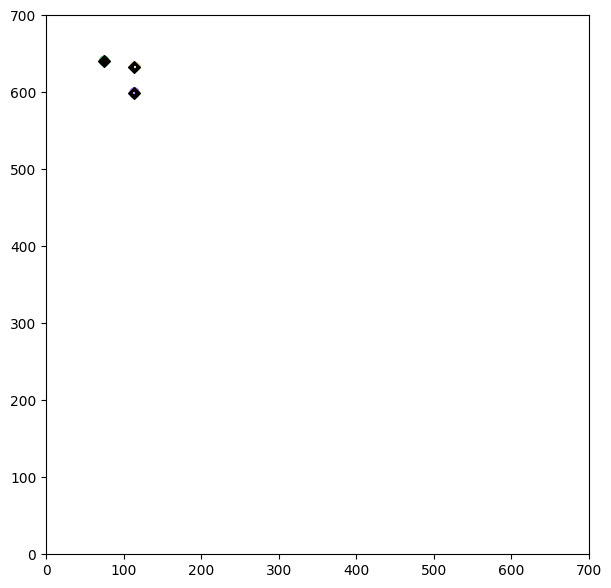

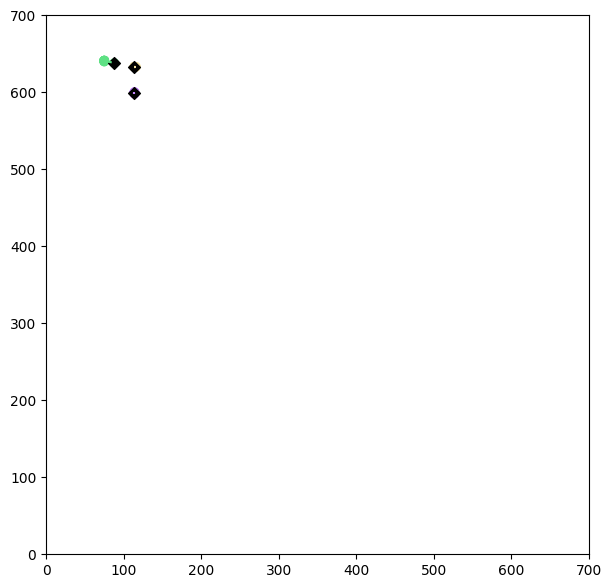

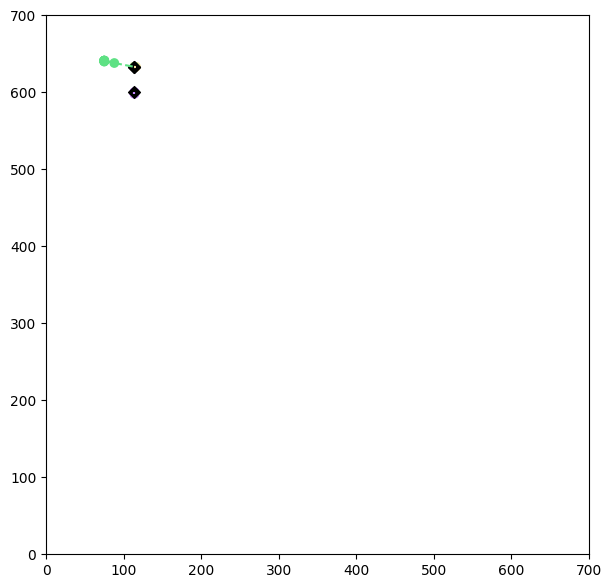

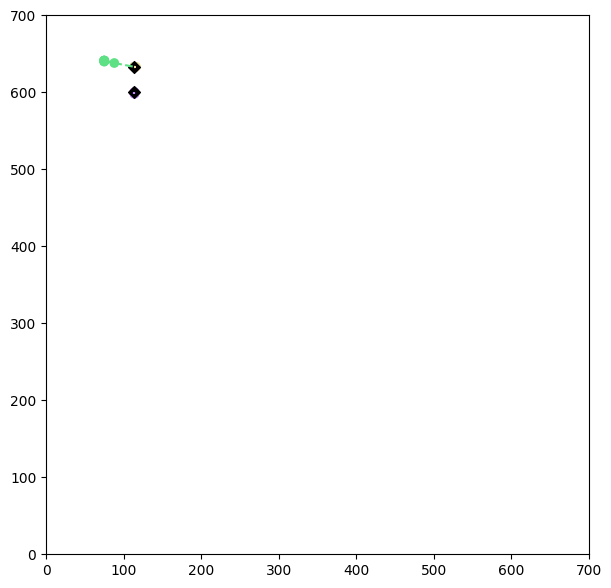

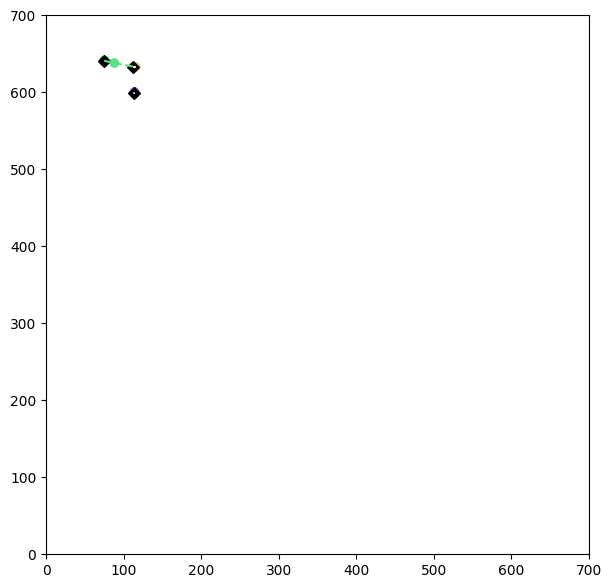

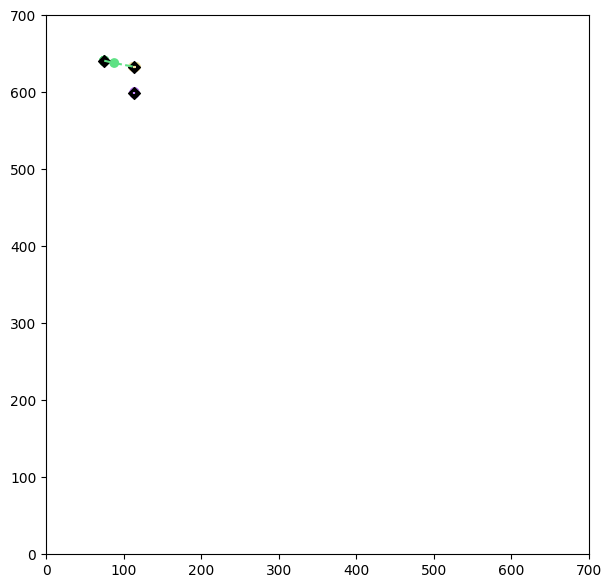

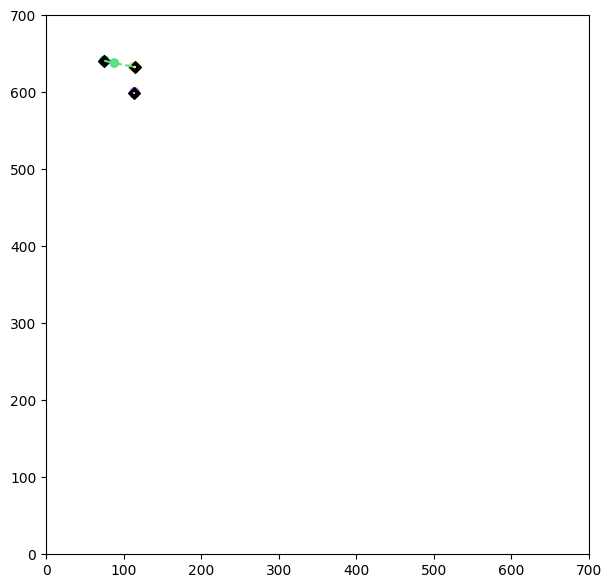

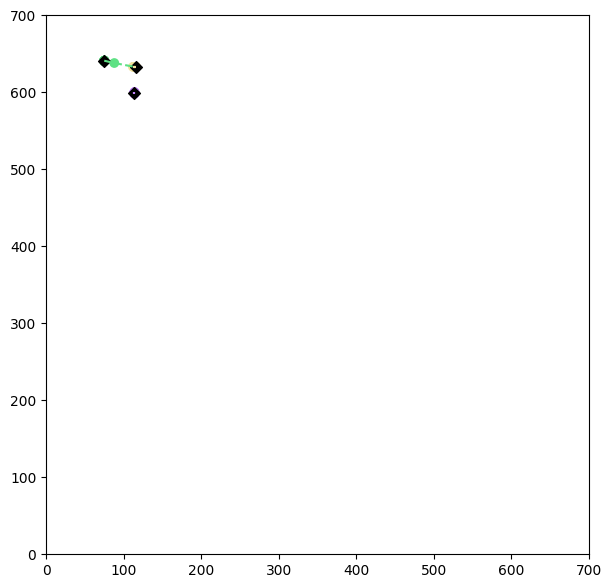

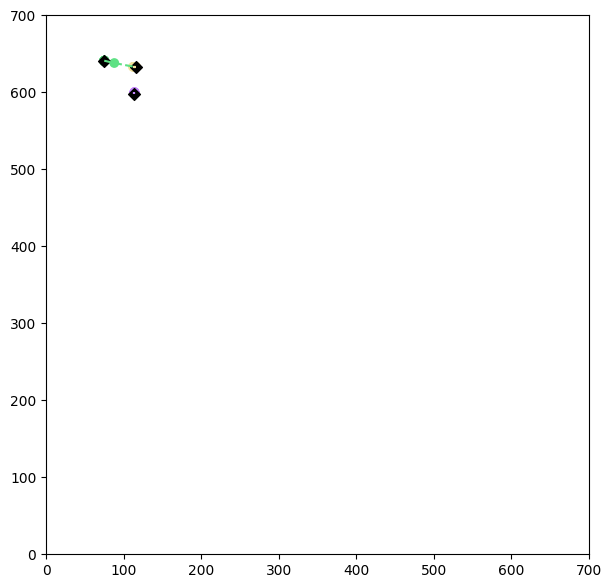

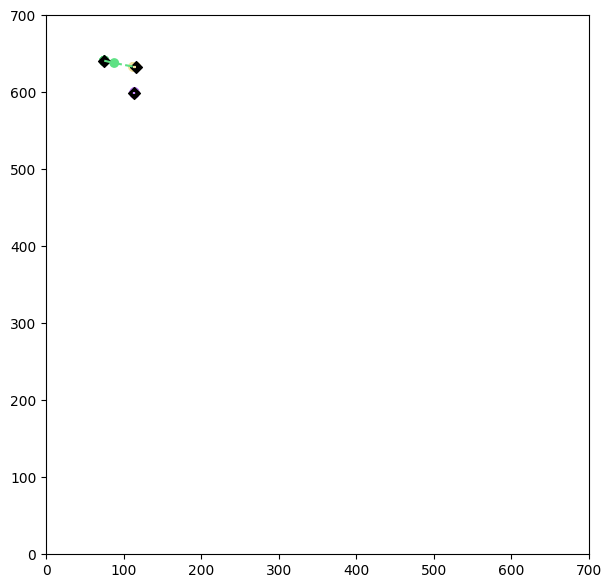

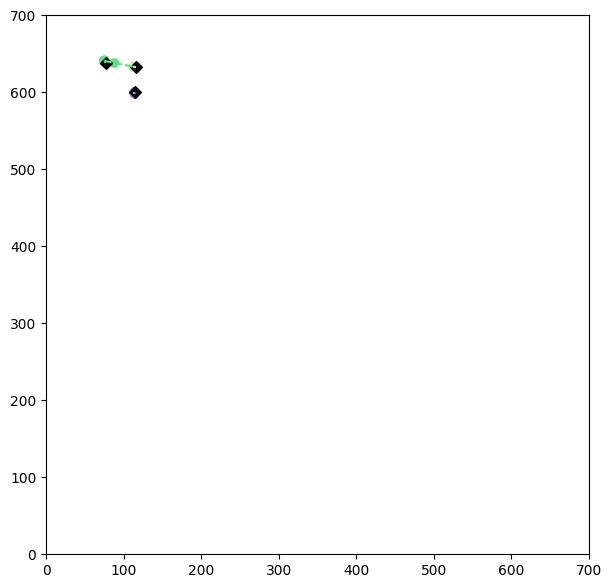

In [45]:
train_visualization(nodes.squeeze())

In [ ]:
ret_nodes, ret_attn, ops = sample(obs_nodes, obs_edges, obs_nodesPresent, obs_edgesPresent, saved_args, net, nodes, edges, nodesPresent)
ret_nodes,nodes = ret_nodes.cpu().numpy(),nodes.cpu().numpy()
x_arr,y_arr = ops[0],ops[1]

In [ ]:
ret_attn

In [ ]:
ret_nodes[-1]

In [ ]:
nodes[-1]

In [ ]:
# assign colors
observed_length = saved_args.obs_length

In [ ]:
def train_visualization(nodes,ret_nodes,attn_weights,x_arr,y_arr,upto=0,peds = 2,color_dict = None,prediction=False):
    print('Visualization imminent')
    fig,ax = plt.subplots()
    traj_length, numNodes, _ = nodes.shape
    traj_data = {}
    for tstep in range(traj_length):
        pred_pos = ret_nodes[tstep, :]
        true_pos = nodes[tstep, :]

        for ped in range(numNodes):
            if ped not in traj_data and tstep < observed_length:
                traj_data[ped] = [[], []]

            if ped in nodesPresent[tstep]:
                traj_data[ped][0].append(true_pos[ped, :])
                traj_data[ped][1].append(pred_pos[ped, :])
    
    if prediction:nodes__ = ret_nodes
    else: nodes__ = nodes
    if color_dict is None: color_dict = {k:np.random.rand(3) for k in range(nodes.shape[1])}
        
    if upto !=0:
        limit,marker,linestyle = upto,'o','dashed' 
    else:
        limit,marker,linestyle = upto,'o','dashed' 
        
    if upto != 0:    
        ## Ground truth frame
        for frames in range(nodes.shape[0]+1): 
#             if frames >= upto:
#                 marker,linestyle = '+','dashed'
#             else:
            marker,linestyle = 'o','solid'
            
            for frame_id in range(frames):
                current_frame = nodes[frame_id,:,:]
                current_peds = np.array([i for i,(x,y) in enumerate(current_frame) if (x != 0) and (y != 0)])
                plt.scatter(current_frame[current_peds][:,1],current_frame[current_peds][:,0],c = [color_dict[c] for c in current_peds],\
                            marker=marker,linestyle=linestyle)

                if frame_id>0:

                    prev_frame = nodes[frame_id-1,:,:]
                    prev_peds  = np.array([i for i,(x,y) in enumerate(prev_frame) if (x != 0) and (y != 0)])
                    common = np.array(list(set(prev_peds) & set(current_peds)))
                    for i in range(len(common)):
                        plt.plot([prev_frame[common[i], 1], current_frame[common[i], 1]],[prev_frame[common[i], 0], current_frame[common[i], 0]],\
                                 c = color_dict[common[i]],linestyle=linestyle,marker=marker)
                        
        for frames in range(nodes.shape[0]+1):
            if frames >= upto:
                marker,linestyle = '+','dashed'
            else:
                marker,linestyle = 'o','solid'
            
            for frame_id in range(frames):
                current_frame = ret_nodes[frame_id,:,:]
                current_peds = np.array([i for i,(x,y) in enumerate(current_frame) if (x != 0) and (y != 0)])
                plt.scatter(current_frame[current_peds][:,1],current_frame[current_peds][:,0],c = [color_dict[c] for c in current_peds],\
                            marker=marker,linestyle=linestyle)

                if frame_id>0:

                    prev_frame = ret_nodes[frame_id-1,:,:]
                    prev_peds  = np.array([i for i,(x,y) in enumerate(prev_frame) if (x != 0) and (y != 0)])
                    common = np.array(list(set(prev_peds) & set(current_peds)))
                    for i in range(len(common)):
                        plt.plot([prev_frame[common[i], 1], current_frame[common[i], 1]],[prev_frame[common[i], 0], current_frame[common[i], 0]],\
                                 c = color_dict[common[i]],linestyle=linestyle,marker=marker)
       
        peds_other = attn_weights[-1][peds][1]
        attn_w = attn_weights[-1][peds][0]
        traj_ped_o = np.array(traj_data[peds][1]) if prediction else np.array(traj_data[peds][0])
        circle = plt.Circle((traj_ped_o[-1, 1], traj_ped_o[-1, 0]), 0.01, fill=False, color='k', linewidth=2)
        #ax.add_artist(circle)
        
        for ped in range(nodes.shape[1]):
            x,y = nodes__[-1,ped]
            plt.scatter(y,x,color='k')
        
        for ind_ped, ped_o in enumerate(peds_other):
            traj_ped_o = np.array(traj_data[ped_o][1]) if prediction else np.array(traj_data[ped_o][0]) 
            weight = attn_w[ind_ped]
            c = np.random.rand(3)
            circle = plt.Circle((traj_ped_o[-1, 1], traj_ped_o[-1, 0]), weight*0.1, fill=False, color='b', linewidth=2)
            ax.add_artist(circle)
        
#         for humans in range(nodes.shape[1]):
#             plt.scatter(y_arr[:,humans],x_arr[:,humans],color = color_dict[humans],linewidths=0.0001)

    else:
        for frames in range(nodes.shape[0]):
            #fig = plt.figure(figsize=(7,7))
            for frame_id in range(frames):
                current_frame = nodes[frame_id,:,:]
                current_peds = np.array([i for i,(x,y) in enumerate(current_frame) if (x != 0) and (y != 0)])
                plt.scatter(current_frame[current_peds][:,1],current_frame[current_peds][:,0],c = [color_dict[c] for c in current_peds],marker='o')

                if frame_id>0:

                    prev_frame = nodes[frame_id-1,:,:]
                    prev_peds  = np.array([i for i,(x,y) in enumerate(prev_frame) if (x != 0) and (y != 0)])
                    common = np.array(list(set(prev_peds) & set(current_peds)))
                    for i in range(len(common)):
                        plt.plot([prev_frame[common[i], 1], current_frame[common[i], 1]],[prev_frame[common[i], 0], current_frame[common[i], 0]],\
                                 c = color_dict[common[i]],linestyle='solid',marker='+')
    return fig,ax


In [ ]:
fig = train_visualization(nodes,ret_nodes,ret_attn,x_arr,y_arr,upto=observed_length,prediction=True,peds=1)

In [ ]:
color_dict = {k:np.random.rand(3) for k in range(nodes.shape[1])}

In [ ]:
flag = True

In [ ]:
while flag:
    x, _, frameIDs, d = dataloader.next_batch(randomUpdate=False)
    stgraph = ST_GRAPH(1, saved_args.obs_length+saved_args.pred_length)
    stgraph.readGraph(x)
    nodes, edges, nodesPresent, edgesPresent = stgraph.getSequence()
    nodes = Variable(torch.from_numpy(nodes).float(), volatile=True).cuda()
    edges = Variable(torch.from_numpy(edges).float(), volatile=True).cuda()
    obs_nodes, obs_edges, obs_nodesPresent, obs_edgesPresent = nodes[:saved_args.obs_length], edges[:saved_args.obs_length], \
    nodesPresent[:saved_args.obs_length], edgesPresent[:saved_args.obs_length]
    ret_nodes, ret_attn, ops = sample(obs_nodes, obs_edges, obs_nodesPresent, obs_edgesPresent, saved_args, net, nodes, edges, nodesPresent)
    ret_nodes,nodes = ret_nodes.cpu().numpy(),nodes.cpu().numpy()
    x_arr,y_arr = ops[0],ops[1]
    observed_length = saved_args.obs_length
    fig = train_visualization(nodes,ret_nodes,ret_attn,x_arr,y_arr,upto=observed_length,prediction=True,peds=0,color_dict = color_dict)
    plt.show()
    inp = input('Okay?')
    if inp == 'y':flag = False

In [ ]:
color_dict = {k:np.random.rand(3) for k in range(nodes.shape[1])}

In [ ]:
train_visualization(nodes,ret_nodes,ret_attn,x_arr,y_arr,upto=19,color_dict=color_dict,prediction=True,peds=3)

In [ ]:
train_visualization(nodes,ret_nodes,ret_attn,x_arr,y_arr,upto=8,color_dict=color_dict,prediction=True)

In [ ]:
train_visualization(ret_nodes,upto=8,color_dict=color_dict)

In [ ]:
plt.figure(figsize=(8,8))
for ped_id in range(nodes.shape[0]):
    frame = nodes[:,ped_id,:]
#     # Get the details of the pedestrians in the current frame
#     peds = np.array([i for i,(x,y) in enumerate(frame) if (x != 0) and (y != 0)])
    if ped_id > 7:
        marker = '+'
    else:
        marker = 'o'
    plt.plot(frame[:,1],frame[:,0],color = color_dict[ped_id],linestyle='solid',marker=marker)
    plt.xlabel('x(m)')
    plt.ylabel('y(m)') 
    
    plt.legend(color_dict.keys())

In [ ]:
plt.figure(figsize=(8,8))
for ped_id in range(7):
    frame = ret_nodes[:,ped_id,:]
#     # Get the details of the pedestrians in the current frame
#     peds = np.array([i for i,(x,y) in enumerate(frame) if (x != 0) and (y != 0)])
    plt.plot(frame[:,1],frame[:,0],color = color_dict[ped_id],linestyle='solid',marker='o')
    plt.xlabel('x(m)')
    plt.ylabel('y(m)') 
    
    plt.legend(color_dict.keys())

In [ ]:
color_dict = {k:np.random.rand(3) for k in range(nodes.shape[1])}
for i in range(ret_nodes.shape[0]):
    current_frame = ret_nodes[i,:,:]
    current_peds = np.array([i for i,(x,y) in enumerate(current_frame) if (x != 0) and (y != 0)])
    plt.

In [ ]:
loss_pred

In [ ]:
outputs.shape

In [ ]:
attn_w[0][3][0].shape

In [ ]:
ret_attn = []

# Propagate the predicted length of trajectory (sampling from previous prediction)
for tstep in range(7, 19):
    # TODO Not keeping track of nodes leaving the frame (or new nodes entering the frame, which I don't think we can do anyway)
    # Forward prop
    outputs, h_nodes, h_edges, c_nodes, c_edges, attn_w = net(ret_nodes[tstep].view(1, numNodes, 2), ret_edges[tstep].view(1, numNodes*numNodes, 2),
                                                              [nodesPresent[args.obs_length-1]], [edgesPresent[args.obs_length-1]], h_nodes, h_edges, c_nodes, c_edges)
    loss_pred = Gaussian2DLikelihoodInference(outputs, true_nodes[tstep + 1].view(1, numNodes, 2), nodesPresent[args.obs_length-1], [true_nodesPresent[tstep + 1]])

    # Sample from o
    # mux, ... are tensors of shape 1 x numNodes
    mux, muy, sx, sy, corr = getCoef(outputs)
    next_x, next_y = sample_gaussian_2d(mux.data, muy.data, sx.data, sy.data, corr.data, nodesPresent[args.obs_length-1])

    ret_nodes[tstep + 1, :, 0] = next_x
    ret_nodes[tstep + 1, :, 1] = next_y

    # Compute edges
    # TODO Currently, assuming edges from the last observed time-step will stay for the entire prediction length
    ret_edges[tstep + 1, :, :] = compute_edges(ret_nodes.data, tstep + 1, edgesPresent[args.obs_length-1])

    # Store computed attention weights
    ret_attn.append(attn_w[0])

In [ ]:
ret_nodes.shape

In [ ]:
state_dict

In [ ]:
net.parameters()

In [ ]:
count = 0
for weight in net.parameters():
    count+=weight.numel()

In [ ]:
count

In [ ]:
print(f'{count:,}')

In [ ]:

stgraph = ST_GRAPH(1, 20 + 1)

In [ ]:
for batch in range(dataloader.num_batches):
    x, _, _, d = dataloader.next_batch(randomUpdate=True)
    for sequence in range(dataloader.batch_size):
        # Construct the graph for the current sequence
        stgraph.readGraph([x[sequence]])
#         print('ST graph constructed from a sequence')
#         stgraph.printGraph()
        nodes, edges, nodesPresent, edgesPresent = stgraph.getSequence()
        break
    break

In [ ]:
peds

In [ ]:
peds2 = np.array([1,3])

In [ ]:
np.array(list(set(peds) & set(peds2)))

In [ ]:
# assign colors
color_dict = {k:np.random.rand(3) for k in range(nodes.shape[1])}

In [ ]:
nodes

In [ ]:
data = current_peds

In [ ]:
current_peds

In [ ]:
data

In [ ]:
current_frame

In [ ]:
ped = nodes[:,20,:]

In [ ]:
ped

In [ ]:
nodes[0,:,:]

In [ ]:
prev_peds  = np.array([i for i,(x,y) in enumerate(prev_frame) if (x != 0) and (y != 0)])

In [ ]:
plt.plot([prev_frame[prev_peds][:,1],current_frame[current_peds][:,1]],[prev_frame[prev_peds][:,0],current_frame[current_peds][:,0]])

In [ ]:
prev_frame[prev_peds][:,1].tolist()+current_frame[current_peds][:,1].tolist()

In [ ]:
[prev_frame[prev_peds][:,1],current_frame[current_peds][:,1]]

In [ ]:
np.hstack((prev_frame[prev_peds][:,1],current_frame[current_peds][:,1]))

In [ ]:
[prev_frame[prev_peds][:,0].tolist()+current_frame[current_peds][:,0].tolist()]

In [ ]:
[prev_frame[prev_peds][:,0].tolist(),current_frame[current_peds][:,0].tolist()]

In [ ]:
plt.plot(prev_frame[prev_peds][:,1].tolist()+current_frame[current_peds][:,1].tolist(), prev_frame[prev_peds][:,0].tolist()+current_frame[current_peds][:,0].tolist())

In [ ]:
prev_peds

In [ ]:
current_peds

In [ ]:
common = np.array(list(set(prev_peds) & set(current_peds)))

In [ ]:
common

In [ ]:
for frames in range(nodes.shape[0]):
    fig = plt.figure(figsize=(7,7))
    for frame_id in range(frames):
        current_frame = nodes[frame_id,:,:]
        current_peds = np.array([i for i,(x,y) in enumerate(current_frame) if (x != 0) and (y != 0)])
        plt.scatter(current_frame[current_peds][:,1],current_frame[current_peds][:,0],c = [color_dict[c] for c in current_peds],marker='o')
        
        if frame_id>0:
            prev_frame = nodes[frame_id-1,:,:]
            prev_peds  = np.array([i for i,(x,y) in enumerate(prev_frame) if (x != 0) and (y != 0)])
            common = np.array(list(set(prev_peds) & set(current_peds)))
            for i in range(len(common)):
                plt.plot([prev_frame[common[i], 1], current_frame[common[i], 1]],
                         [prev_frame[common[i], 0], current_frame[common[i], 0]],c = color_dict[common[i]],linestyle='dashed')
    plt.show()    

In [ ]:
nodes = nodes[1:,:,:]

In [ ]:
for frames in range(nodes.shape[0]):
    fig = plt.figure(figsize=(7,7))
    for frame_id in range(frames):
        current_frame = nodes[frame_id,:,:]
        current_peds = np.array([i for i,(x,y) in enumerate(current_frame) if (x != 0) and (y != 0)])
        plt.scatter(current_frame[current_peds][:,1],current_frame[current_peds][:,0],c = [color_dict[c] for c in current_peds],marker='o')
        
        if frame_id>0:
            prev_frame = nodes[frame_id-1,:,:]
            prev_peds  = np.array([i for i,(x,y) in enumerate(prev_frame) if (x != 0) and (y != 0)])
            common = np.array(list(set(prev_peds) & set(current_peds)))
            for i in range(len(common)):
                plt.plot([prev_frame[common[i], 1], current_frame[common[i], 1]],
                         [prev_frame[common[i], 0], current_frame[common[i], 0]],c = color_dict[common[i]],linestyle='dashed')
    plt.show()    

In [ ]:
current_frame.shape

In [ ]:
for pedestrians in range(nodes.shape[1]):
    

In [ ]:

for frame_id in range(nodes.shape[0]):
    current_frame = nodes[frame_id,:,:]
    current_peds = np.array([i for i,(x,y) in enumerate(current_frame) if (x != 0) and (y != 0)])
    plt.scatter(current_frame[current_peds][:,1],current_frame[current_peds][:,0],c = [color_dict[c] for c in current_peds],marker='o')

In [ ]:
# assign colors
color_dict = {k:np.random.rand(3) for k in range(nodes.shape[1])}
figure, ax = plt.subplots(figsize=(10, 8))

for frame_id in range(nodes.shape[0]):
    current_frame = nodes[frame_id,:,:]
#     # Get the details of the pedestrians in the current frame
    current_peds = np.array([i for i,(x,y) in enumerate(current_frame) if (x != 0) and (y != 0)])

    ax.scatter(frame[peds][:,1],frame[peds][:,0],c = [color_dict[c] for c in peds],marker='o')
#     ax.xlabel('x(m)')
#     ax.ylabel('y(m)') 
    
    ax.legend(color_dict.keys())

In [ ]:
# assign colors
prev_frame = None
prev_peds  =  None

color_dict = {k:np.random.rand(3) for k in range(nodes.shape[1])}
plt.figure(figsize=(8,8))
for frame_id in range(nodes.shape[0]):
    current_frame = nodes[frame_id,:,:]
#     # Get the details of the pedestrians in the current frame
    current_peds = np.array([i for i,(x,y) in enumerate(current_frame) if (x != 0) and (y != 0)])
    common_peds = np.array(list(set(current_peds) & set(prev_peds)))
    if len(common_peds)!=0:
        for human in common_peds:
            plt.plot([prev_frame[peds][1],frame[peds][1]],[prev_frame[peds][1],frame[peds][1]],linestyle='dashed',marker='o',color = color_dict[human])
        prev_frame,prev_peds = current_frame,current_peds
        
    plt.scatter(frame[peds][:,1],frame[peds][:,0],c = [color_dict[c] for c in peds],marker='o')
    plt.xlabel('x(m)')
    plt.ylabel('y(m)') 
    
    plt.legend(color_dict.keys())

In [ ]:
# assign colors
color_dict = {k:np.random.rand(3) for k in range(nodes.shape[1])}
plt.figure(figsize=(8,8))
for ped_id in range(nodes.shape[1]):
    frame = nodes[:,ped_id,:]
#     # Get the details of the pedestrians in the current frame
#     peds = np.array([i for i,(x,y) in enumerate(frame) if (x != 0) and (y != 0)])
    plt.plot(frame[:,1],frame[:,0],color = color_dict[ped_id],linestyle='dashed',marker='o')
    plt.xlabel('x(m)')
    plt.ylabel('y(m)') 
    
    plt.legend(color_dict.keys())

In [ ]:
color_dict

In [ ]:
peds

In [ ]:
frame1

In [ ]:
plt.scatter(frame1[:,1],frame1[:,0])